In [2]:
import acquire as a 
df = a.get_store_data()

# Preparing Time Series Data
Like most preparation processes, but now with dates!

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from env import username, password, host
import os
# from acquire import wrangle_store_data

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Acquire
We'll start by loading up the data from mysql server.

In [3]:
# The following are functions contained in the accompanying acquire.py file

def get_db_url(database):
    return f'mysql+pymysql://{username}:{password}@{host}/{database}'

def get_store_data():
    '''
    Returns a dataframe of all store data in the tsa_item_demand database and saves a local copy as a csv file.
    '''
    query = '''
    SELECT *
    FROM items
    JOIN sales USING(item_id)
    JOIN stores USING(store_id) 
    '''
    
    df = pd.read_sql(query, get_db_url('tsa_item_demand'))
    
    df.to_csv('tsa_item_demand.csv', index=False)
    
    return df

def wrangle_store_data():
    filename = 'tsa_store_data.csv'
    
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    else:
        df = get_store_data()
        
    return df

In [4]:
df['sale_date'] = pd.to_datetime(df.sale_date)
df=df.set_index('sale_date').sort_index()

In [5]:
df_1 =  wrangle_store_data()

In [6]:
df_1

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912996,2017-12-27,63,8503 NW Military Hwy,78231,San Antonio,TX
912996,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912997,2017-12-28,59,8503 NW Military Hwy,78231,San Antonio,TX
912997,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912998,2017-12-29,74,8503 NW Military Hwy,78231,San Antonio,TX
912998,10,50,47445919221,47445919221,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,912999,2017-12-30,62,8503 NW Military Hwy,78231,San Antonio,TX


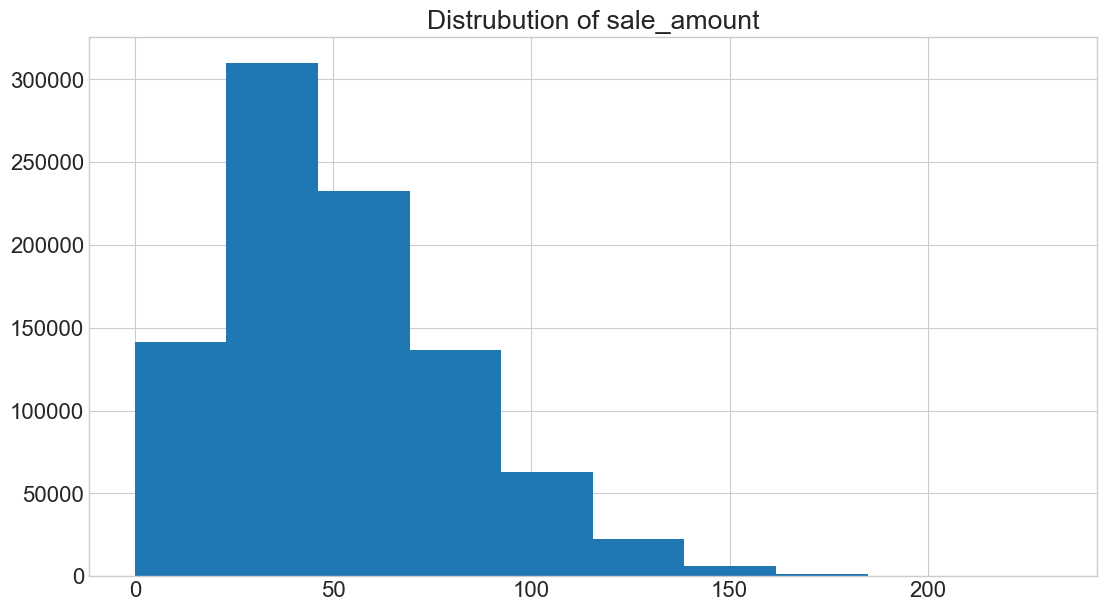

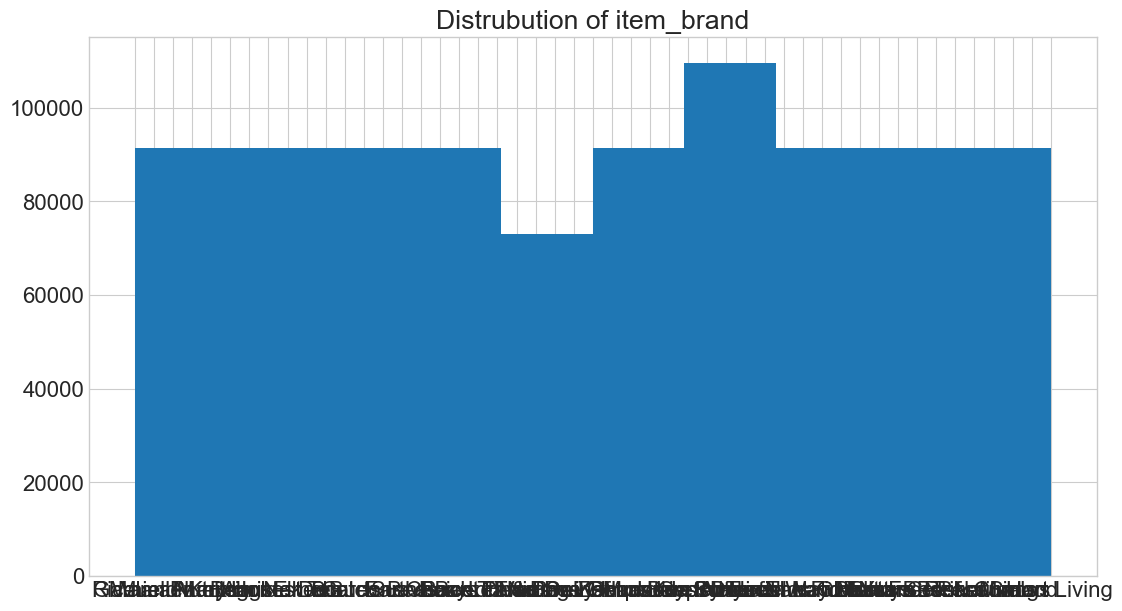

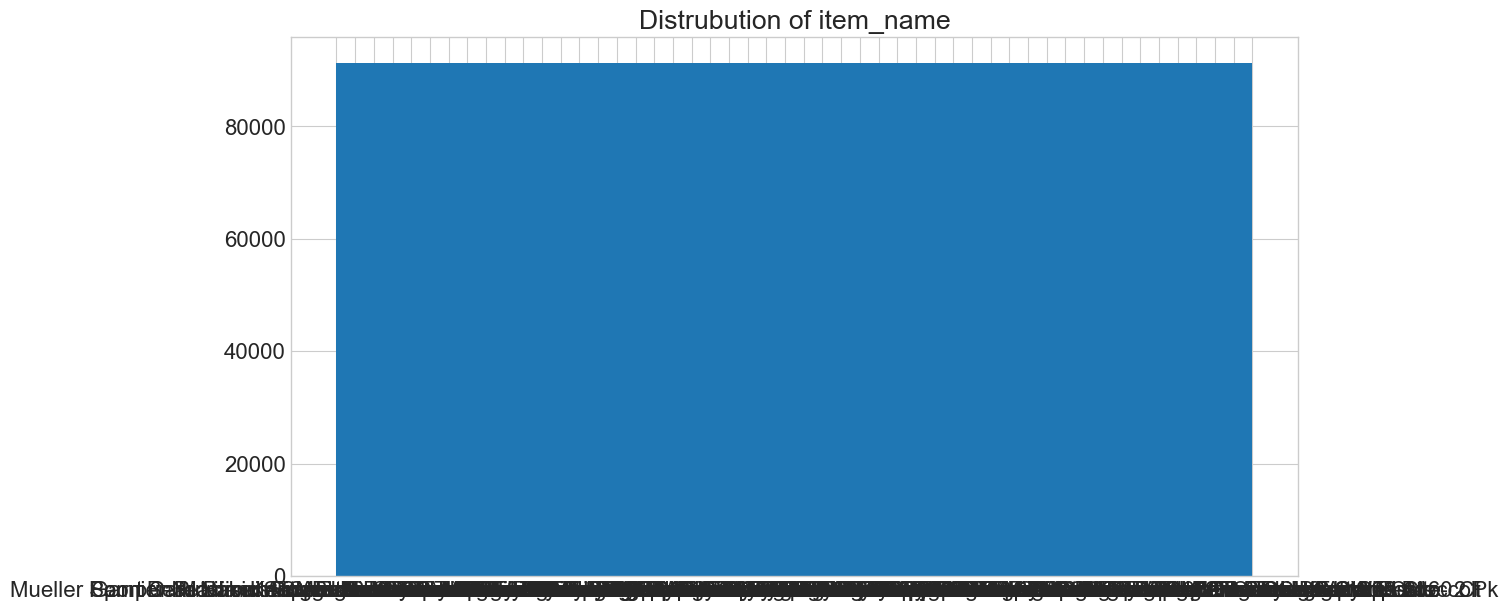

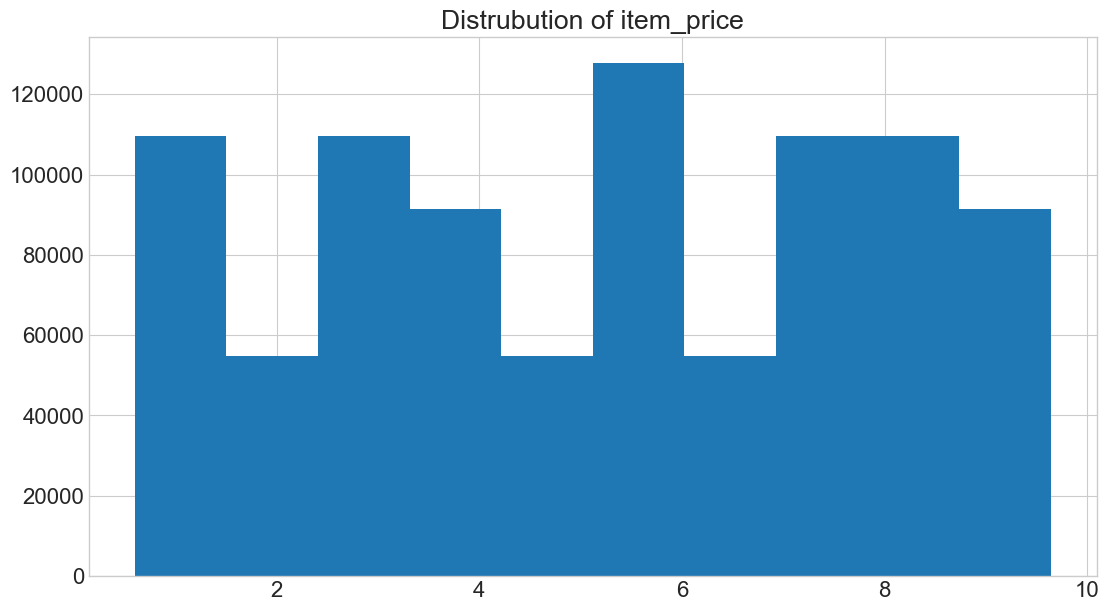

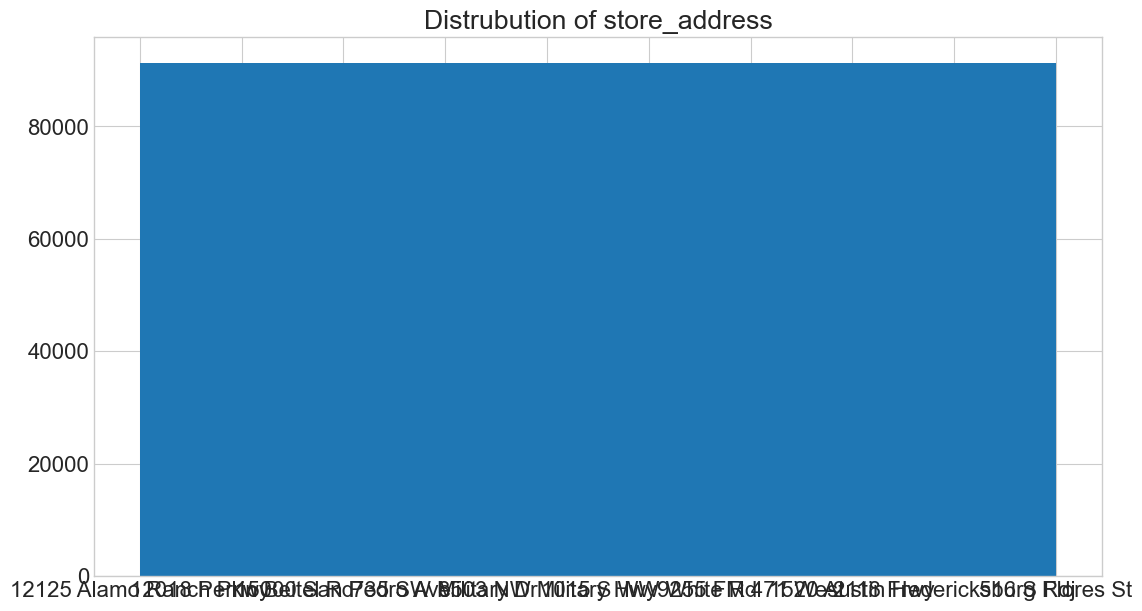

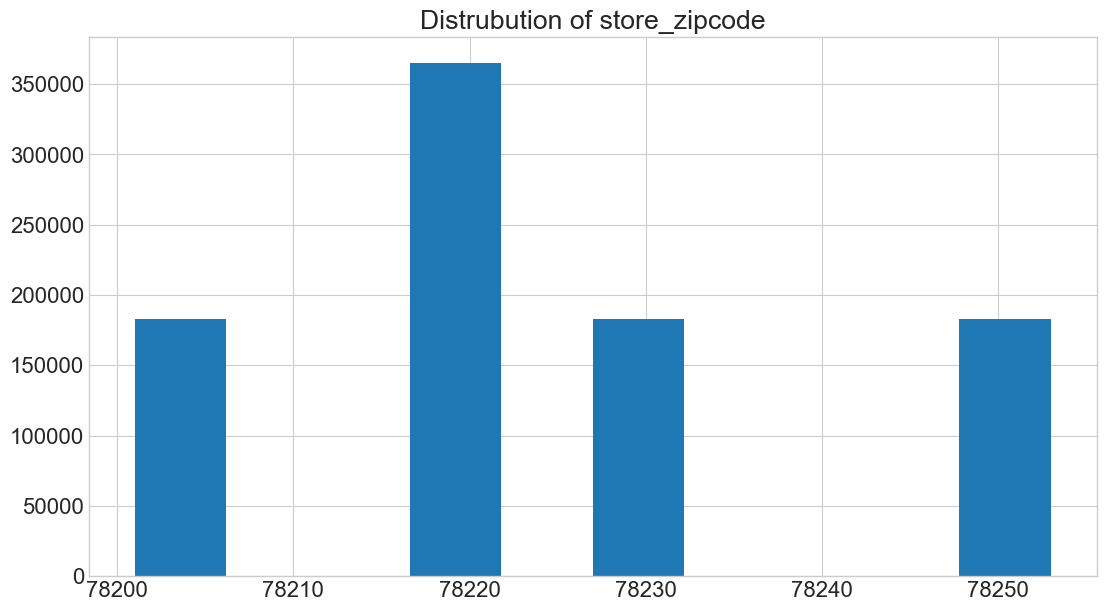

In [14]:
for cols in df.columns:
    plt.hist(df[cols])
    plt.title(f'Distrubution of {cols}')
    plt.show()

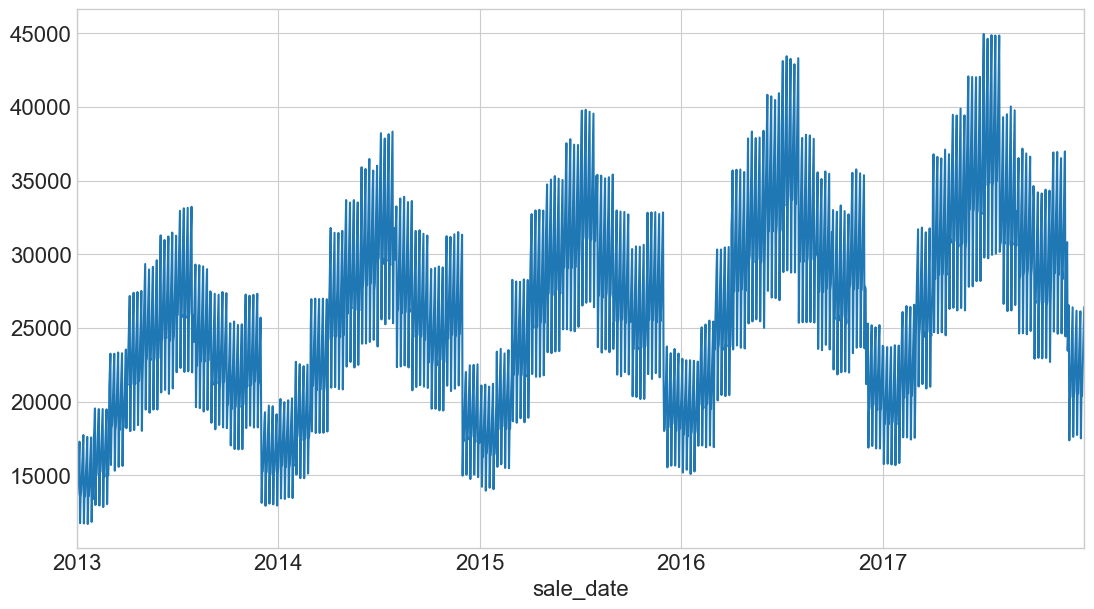

In [10]:
df.groupby('sale_date').sale_amount.sum().plot()
plt.show()